In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from modules.Table import TableUserInferface

In [2]:
tui = TableUserInferface()
tui.calc_ga_node_ids()

Generating contraction hierarchies with 16 threads.
Setting CH node vector of size 35909
Setting CH edge vector of size 79532
Range graph removed 79532 edges of 159064
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [3]:
tui.calc_travel_time_to_green_areas()

In [ ]:
gpd.GeoDataFrame

<Axes: >

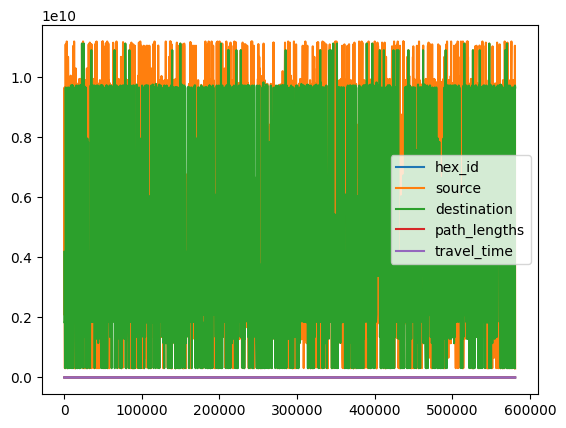

In [5]:
paths = tui.gdf_ga_paths
paths[paths['class']=='PK'].plot()

In [ ]:
tui.

In [30]:
greenareas = tui.ga.node_set
units = tui.unit
net = tui.st.current_scenario['net']

In [28]:
units

,id,left,top,right,bottom,hex_id,geometry,centroid,area,node_ids
0,1489.0,672550.569544,5.921697e+06,672608.304571,5.921647e+06,0,"POLYGON Z ((672593.871 5921646.707 0.000, 6725...",POINT (672579.437 5921671.707),2165.063509,6762930952
1,3801.0,674066.114001,5.921572e+06,674123.849028,5.921522e+06,1,"POLYGON Z ((674109.415 5921521.707 0.000, 6740...",POINT (674094.982 5921546.707),2165.063509,2093018636
2,2885.0,673459.896218,5.921172e+06,673517.631245,5.921122e+06,2,"POLYGON Z ((673503.197 5921121.707 0.000, 6734...",POINT (673488.764 5921146.707),2165.063509,9665359133
3,2669.0,673329.992408,5.922097e+06,673387.727434,5.922047e+06,3,"POLYGON Z ((673373.294 5922046.707 0.000, 6733...",POINT (673358.860 5922071.707),2165.063509,309997016
4,3330.0,673763.005109,5.922047e+06,673820.740136,5.921997e+06,4,"POLYGON Z ((673806.306 5921996.707 0.000, 6737...",POINT (673791.873 5922021.707),2165.063509,8336513684
...,...,...,...,...,...,...,...,...,...,...
2329,1087.0,672290.761923,5.921997e+06,672348.496950,5.921947e+06,2329,"POLYGON Z ((672334.063 5921946.707 0.000, 6723...",POINT (672319.629 5921971.707),2165.063509,4187762363
2330,2868.0,673459.896218,5.922022e+06,673517.631245,5.921972e+06,2330,"POLYGON Z ((673503.197 5921971.707 0.000, 6734...",POINT (673488.764 5921996.707),2165.063509,309997023
2331,2795.0,673416.594948,5.922397e+06,673474.329975,5.922347e+06,2331,"POLYGON Z ((673431.029 5922396.707 0.000, 6734...",POINT (673445.462 5922371.707),2165.063509,11057538621
2332,1912.0,672810.377165,5.920347e+06,672868.112192,5.920297e+06,2332,"POLYGON Z ((672868.112 5920321.707 0.000, 6728...",POINT (672856.133 5920330.588),393.781728,9816166317


In [78]:
source = units[['hex_id', 'node_ids']]
destination = greenareas[['ID_AV', 'osmid']]

import pandas as pd
import itertools

# Supongamos que tienes dos DataFrames df1 y df2

# Genera todas las combinaciones posibles entre los registros de los DataFrames
combinations = list(itertools.product(source.to_records(index=False), destination.to_records(index=False)))

# Crea una nueva lista con 4 registros por elemento
nueva_lista = [list(item1) + list(item2) for item1, item2 in combinations]

df_columns = ['hex_id', 'source', 'ID_AV', 'destination']
# Crea un DataFrame a partir de las combinaciones
df_combinations = pd.DataFrame(nueva_lista, columns=df_columns)

In [79]:
df_combinations['path_lenghts'] = net.shortest_path_lengths(df_combinations['source'], df_combinations['destination'])

In [80]:
df_combinations['class'] = df_combinations['ID_AV'].str[:2]

In [81]:
min_lenght_idx = df_combinations.groupby(['hex_id', 'class'])['path_lenghts'].idxmin().reset_index()
min_paths = df_combinations.loc[min_lenght_idx['path_lenghts']]

In [82]:
from modules.myfunctions import *
min_paths.apply()

,hex_id,source,ID_AV,destination,path_lenghts,class
167,0,6762930952,PK19,4186110396,221.082,PK
237,0,6762930952,SQ24,9684415457,763.816,SQ
268,1,2093018636,PK1,1850412734,605.697,PK
354,1,2093018636,SQ10,892390584,1408.032,SQ
512,2,9665359133,PK1,1825504547,83.395,PK
...,...,...,...,...,...,...
580488,2331,11057538621,SQ3,310072970,327.228,SQ
580720,2332,9816166317,PK1,9731319240,479.444,PK
580799,2332,9816166317,SQ15,1825504476,667.774,SQ
580966,2333,303526618,PK1,9665359129,445.442,PK


Generating contraction hierarchies with 16 threads.
Setting CH node vector of size 36894
Setting CH edge vector of size 81442
Range graph removed 81442 edges of 162884
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


<Axes: >

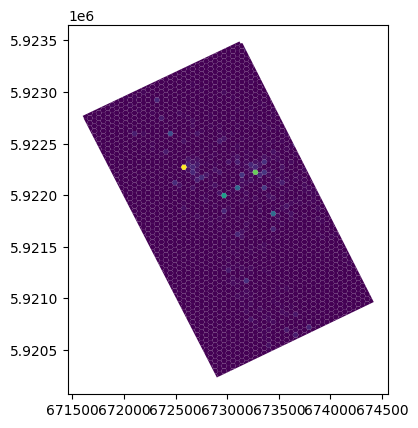

In [3]:
tui.change_scenario(1)
tui.load_unit('hex')
tui.calc_amenities_density()
tui.amenities_density.plot('density')

In [25]:
unit = tui.unit.copy()
select_unit = tui.select_unit
amenities = tui.get_amenities().get_current_amenities().copy()

join_result = gpd.sjoin(amenities, unit, how='inner', op='within')
# count_by_unit = join_result.groupby(f'{select_unit}_id')['counter'].agg('sum').reset_index()
count_by_unit = join_result.groupby(f'{select_unit}_id').size().reset_index(name='amenities_count')
count_by_unit = pd.merge(count_by_unit, unit, on=[f'{select_unit}_id'], how='outer')
count_by_unit['amenities_count'].fillna(0, inplace=True)
count_cols = ['hex_id', 'amenities_count', 'centroid']
count_by_unit = gpd.GeoDataFrame(data=count_by_unit[count_cols], geometry=count_by_unit['geometry'])

<Axes: >

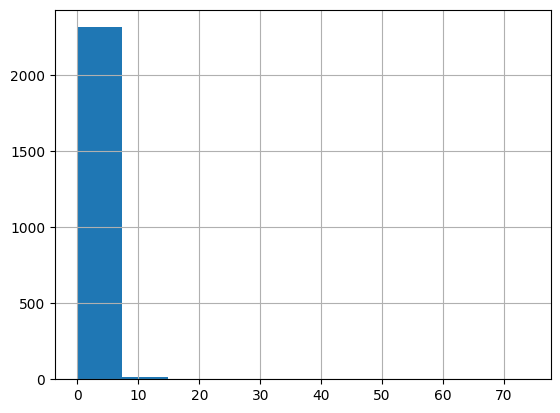

In [119]:
count_by_unit['amenities_count'].hist()

<Axes: >

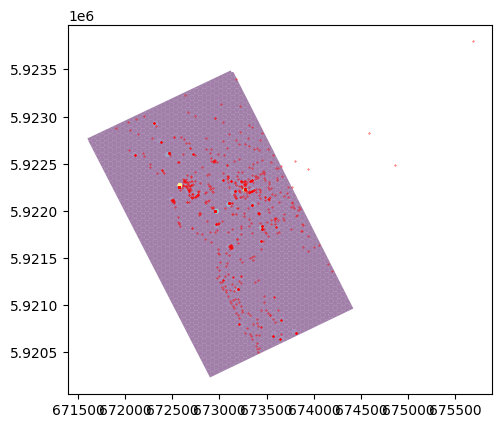

In [120]:
fig, ax = plt.subplots()
count_by_unit.plot(ax=ax, column='amenities_count', alpha=0.5)
amenities.plot(ax=ax, color='red',markersize=0.1)

<Axes: >

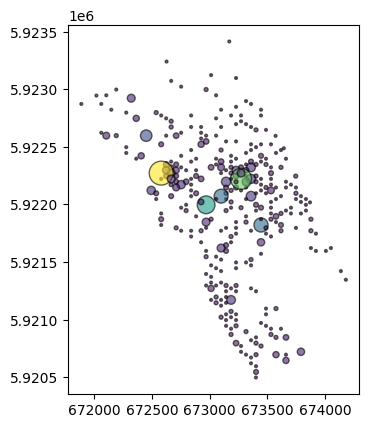

In [124]:
count_cols = [f'{select_unit}_id', 'amenities_count', 'centroid', 'geometry']
count_by_unit.loc[count_by_unit['amenities_count']>0,count_cols].drop(columns=['geometry']).rename(columns={'centroid': 'geometry'}).plot(
    column='amenities_count', markersize=4*count_by_unit['amenities_count'], alpha=0.6, edgecolor='black')

<Axes: >

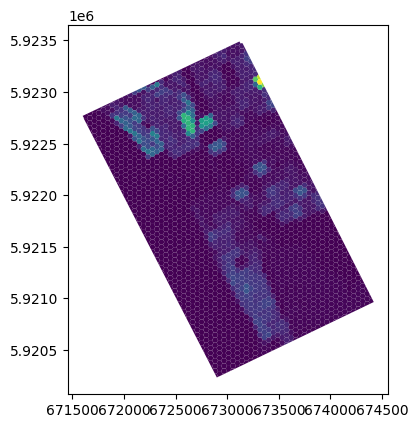

In [16]:
tui.change_scenario(0)
tui.calc_population_density()
tui.population_density.plot(column='density')

Generating contraction hierarchies with 16 threads.
Setting CH node vector of size 36894
Setting CH edge vector of size 81442
Range graph removed 81442 edges of 162884
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


<Axes: >

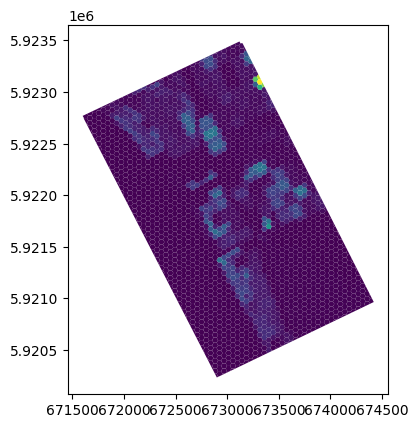

In [17]:
tui.change_scenario(1)
tui.calc_population_density()
tui.population_density.plot(column='density')

tui.calc_heatmaps_kpis()

tui.get_travels_amenities_by_category('Comercio').plot(column='travel_time')

In [69]:
tui_scenarios = {}
for scenario_id in [0, 1]:
    tui.change_scenario(scenario_id)
    tui.calc_heatmaps_kpis()
    tui_scenarios[scenario_id] = tui

Generating contraction hierarchies with 16 threads.
Setting CH node vector of size 36894
Setting CH edge vector of size 81442
Range graph removed 81442 edges of 162884
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [50]:
tui.get_amenities_categories()

['Entretenimiento',
 'Comida para servir',
 'Servicios',
 'Aprovisionamiento',
 'Transporte publico',
 'Educacion',
 'Cuidados',
 'Comercio',
 'Cultura']

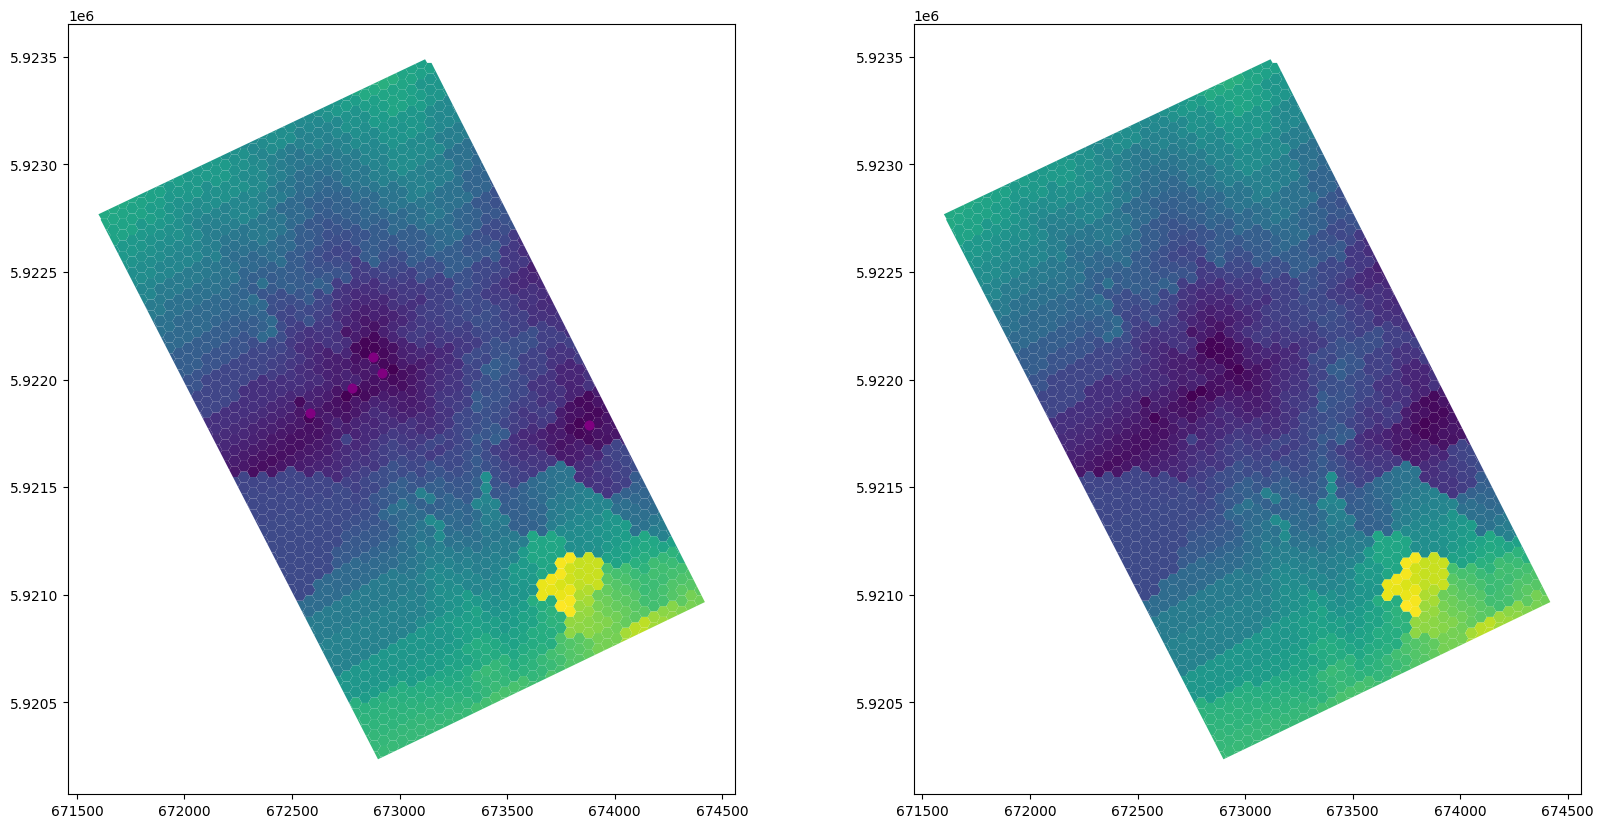

In [71]:
category = 'Cultura'
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(20,10))

for scenario_id in [0, 1]:
    tui_scenarios[scenario_id].get_travels_amenities_by_category(category).plot(column='travel_time', ax=ax[scenario_id])
    gpd.sjoin(
        tui_scenarios[scenario_id].get_amenities().get_current_amenities_by_category(category),
        tui_scenarios[scenario_id].st.area_scope,
        ).plot(ax=ax[0], color='purple')

<Axes: >

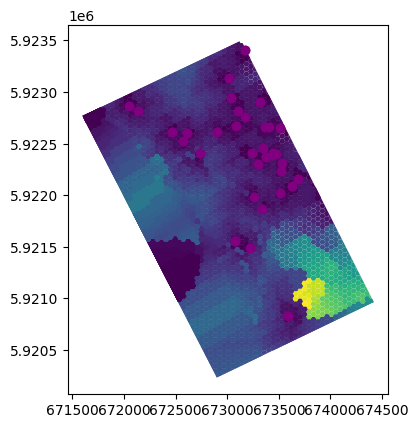

In [44]:
# for scenario in [0, 1]:
#     tui.change_scenario(scenario_id=scenario)
#     tui.calc_land_uses_diversity()
#     tui.save_land_uses_diversity()

In [18]:
tui.calc_kpis()